# Importing datasets

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')


In [2]:
#To print all rows
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
#importing dataset
df = pd.read_csv("flight_price_data.csv") #Reading csv file
df.head()

,Unnamed: 0,Airline,Journey_date,From,Destination,Dep_Time,Arrival_Time,Total_Stops,Duration,Price
0,0,Vistara,04/01/2023,New Delhi,Bengaluru,05:35,08:20,Non stop,02 h 45 m,"₹ 7,184"
1,1,Vistara,04/01/2023,New Delhi,Bengaluru,08:10,10:45,Non stop,02 h 35 m,"₹ 7,184"
2,2,Vistara,04/01/2023,New Delhi,Bengaluru,09:05,11:50,Non stop,02 h 45 m,"₹ 7,184"
3,3,Vistara,04/01/2023,New Delhi,Bengaluru,16:05,18:50,Non stop,02 h 45 m,"₹ 7,184"
4,4,Air India,04/01/2023,New Delhi,Bengaluru,16:55,20:15,Non stop,03 h 20 m,"₹ 7,184"


# Since Price is my target and it seems to be continuous feature so this perticular problem is Regression Problem.

# Features Information

# Preprocessing and EDA

In [4]:
#Checking shape of my dataset
df.shape

(9095, 10)

In my dataset i have 9095 rows and 10 columns in the dataset

In [5]:
9095#Removing Column "Unnamed:0 as it will not affect our core dataset
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Airline,Journey_date,From,Destination,Dep_Time,Arrival_Time,Total_Stops,Duration,Price
0,Vistara,04/01/2023,New Delhi,Bengaluru,05:35,08:20,Non stop,02 h 45 m,"₹ 7,184"
1,Vistara,04/01/2023,New Delhi,Bengaluru,08:10,10:45,Non stop,02 h 35 m,"₹ 7,184"
2,Vistara,04/01/2023,New Delhi,Bengaluru,09:05,11:50,Non stop,02 h 45 m,"₹ 7,184"
3,Vistara,04/01/2023,New Delhi,Bengaluru,16:05,18:50,Non stop,02 h 45 m,"₹ 7,184"
4,Air India,04/01/2023,New Delhi,Bengaluru,16:55,20:15,Non stop,03 h 20 m,"₹ 7,184"


In [6]:
#Checking all column names
df.columns

Index(['Airline', 'Journey_date', 'From', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Total_Stops', 'Duration', 'Price'],
      dtype='object')

Above are the column names of the dataset.

In [7]:
#Equalizing Price column
df.Price = df.Price.str.replace('[^0-9.]','').astype('int64')
df.head()

,Airline,Journey_date,From,Destination,Dep_Time,Arrival_Time,Total_Stops,Duration,Price
0,Vistara,04/01/2023,New Delhi,Bengaluru,05:35,08:20,Non stop,02 h 45 m,7184
1,Vistara,04/01/2023,New Delhi,Bengaluru,08:10,10:45,Non stop,02 h 35 m,7184
2,Vistara,04/01/2023,New Delhi,Bengaluru,09:05,11:50,Non stop,02 h 45 m,7184
3,Vistara,04/01/2023,New Delhi,Bengaluru,16:05,18:50,Non stop,02 h 45 m,7184
4,Air India,04/01/2023,New Delhi,Bengaluru,16:55,20:15,Non stop,03 h 20 m,7184


In [8]:
#Checking the data types of all columns
df.dtypes

Airline         object
Journey_date    object
From            object
Destination     object
Dep_Time        object
Arrival_Time    object
Total_Stops     object
Duration        object
Price            int64
dtype: object

In [9]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       9095 non-null   object
 1   Journey_date  9095 non-null   object
 2   From          9095 non-null   object
 3   Destination   9095 non-null   object
 4   Dep_Time      9095 non-null   object
 5   Arrival_Time  9095 non-null   object
 6   Total_Stops   9095 non-null   object
 7   Duration      9095 non-null   object
 8   Price         9095 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 639.6+ KB


some of the columns are categorical which need to be encoded. The date,duration and time columns are to be changed to time stamp format to get the data cleaned. The price column that is the target column is of continous type

In [10]:
#Missing values in train data

df.isnull().sum()

Airline         0
Journey_date    0
From            0
Destination     0
Dep_Time        0
Arrival_Time    0
Total_Stops     0
Duration        0
Price           0
dtype: int64

It is showing as no null values present in dataset.But lets check for '-' in the dataset as well

Null values removed from training dataset

There are no null values in the training dataset

In [11]:
df[df.Airline=='-']

,Airline,Journey_date,From,Destination,Dep_Time,Arrival_Time,Total_Stops,Duration,Price
1667,-,10/02/2023,New Delhi,Bengaluru,19:05,21:45,Non stop,02 h 40 m,5236
1668,-,10/02/2023,New Delhi,Bengaluru,04:20,07:15,Non stop,02 h 55 m,5237
1669,-,10/02/2023,New Delhi,Bengaluru,05:55,08:45,Non stop,02 h 50 m,5237
1670,-,10/02/2023,New Delhi,Bengaluru,07:00,09:50,Non stop,02 h 50 m,5237
1671,-,10/02/2023,New Delhi,Bengaluru,07:55,11:05,Non stop,03 h 10 m,5237
1672,-,10/02/2023,New Delhi,Bengaluru,09:15,12:05,Non stop,02 h 50 m,5237
1673,-,10/02/2023,New Delhi,Bengaluru,11:45,14:40,Non stop,02 h 55 m,5237
1674,-,10/02/2023,New Delhi,Bengaluru,17:25,20:05,Non stop,02 h 40 m,5237
1675,-,10/02/2023,New Delhi,Bengaluru,20:30,23:25,Non stop,02 h 55 m,5237
1676,-,10/02/2023,New Delhi,Bengaluru,21:45,00:35,Non stop,02 h 50 m,5237


In [12]:
df[df.Journey_date =='-']

,Airline,Journey_date,From,Destination,Dep_Time,Arrival_Time,Total_Stops,Duration,Price


In [13]:
df[df.From =='-']

,Airline,Journey_date,From,Destination,Dep_Time,Arrival_Time,Total_Stops,Duration,Price
6772,IndiGo,03/02/2023,-,New Delhi,04:25,07:15,Non stop,02 h 50 m,5354
6773,IndiGo,03/02/2023,-,New Delhi,13:45,16:45,Non stop,03 h,5354
6774,IndiGo,03/02/2023,-,New Delhi,16:50,19:45,Non stop,02 h 55 m,5354
6775,IndiGo,03/02/2023,-,New Delhi,18:00,20:50,Non stop,02 h 50 m,5354
6776,IndiGo,03/02/2023,-,New Delhi,20:40,23:35,Non stop,02 h 55 m,5449
6777,Air India,03/02/2023,-,New Delhi,17:55,20:45,Non stop,02 h 50 m,5236
6778,Air India,03/02/2023,-,New Delhi,19:50,22:50,Non stop,03 h,5236
6779,IndiGo,03/02/2023,-,New Delhi,20:40,23:35,Non stop,02 h 55 m,5236
6780,SpiceJet,03/02/2023,-,New Delhi,22:00,01:00,Non stop,03 h,5236


In [14]:
df[df.Destination =='-']

,Airline,Journey_date,From,Destination,Dep_Time,Arrival_Time,Total_Stops,Duration,Price


In [15]:
df[df.Dep_Time =='-']

,Airline,Journey_date,From,Destination,Dep_Time,Arrival_Time,Total_Stops,Duration,Price
1679,-,10/02/2023,New Delhi,Bengaluru,-,10:55,Non stop,02 h 45 m,5235
1680,-,10/02/2023,New Delhi,Bengaluru,-,12:15,Non stop,02 h 45 m,5235


In [16]:
df[df.Arrival_Time =='-']

,Airline,Journey_date,From,Destination,Dep_Time,Arrival_Time,Total_Stops,Duration,Price


In [17]:
df[df.Total_Stops=='-']

,Airline,Journey_date,From,Destination,Dep_Time,Arrival_Time,Total_Stops,Duration,Price


In [18]:
df[df.Duration=='-']

,Airline,Journey_date,From,Destination,Dep_Time,Arrival_Time,Total_Stops,Duration,Price


In [19]:
df[df.Price=='-']

,Airline,Journey_date,From,Destination,Dep_Time,Arrival_Time,Total_Stops,Duration,Price


In [20]:
df.drop(df[df['Airline']=='-'].index,inplace=True)

In [21]:
df.drop(df[df['Arrival_Time']=='-'].index,inplace=True)

In [22]:
df.drop(df[df['From']=='-'].index,inplace=True)

In [23]:
df.shape

(9064, 9)

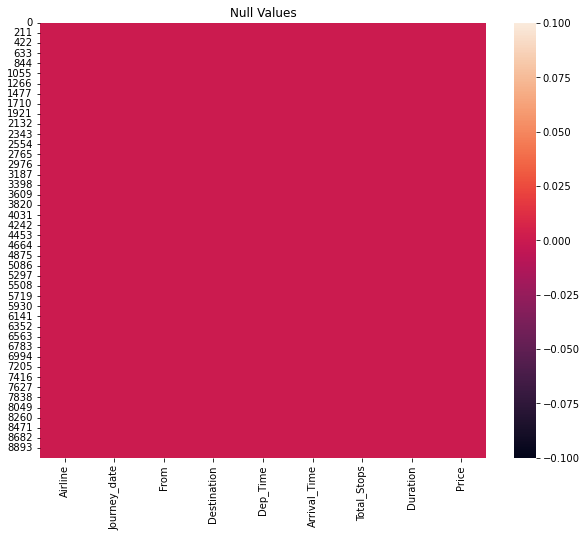

In [24]:
# heatmap on null values
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Null values or blank spaces, '-' are not present in the dataset Now

# Feature Extraction

In [25]:
df['Journey_date'].unique()

array(['04/01/2023', '05/01/2023', '06/01/2023', '07/01/2023',
       '08/01/2023', '09/01/2023', '10/01/2023', '11/01/2023',
       '12/01/2023', '13/01/2023', '14/01/2023', '15/01/2023',
       '16/01/2023', '17/01/2023', '18/01/2023', '19/01/2023',
       '20/01/2023', '21/01/2023', '22/01/2023', '23/01/2023',
       '24/01/2023', '25/01/2023', '26/01/2023', '27/01/2023',
       '28/01/2023', '29/01/2023', '30/01/2023', '31/01/2023',
       '01/02/2023', '02/02/2023', '03/02/2023', '04/02/2023',
       '05/02/2023', '06/02/2023', '07/02/2023', '08/02/2023',
       '09/02/2023', '10/02/2023', '11/02/2023', '12/02/2023',
       '13/02/2023', '14/02/2023', '15/02/2023', '16/02/2023',
       '17/02/2023', '18/02/2023', '19/02/2023', '20/02/2023',
       '21/02/2023', '22/02/2023', '23/02/2023', '24/02/2023',
       '25/02/2023', '26/02/2023', '27/02/2023', '28/02/2023',
       '01/03/2023', '02/03/2023', '03/03/2023', '04/03/2023',
       '05/03/2023', '06/03/2023', '07/03/2023', '08/03

In [26]:
#Extracting Journey year,month and day from Journey_date

#Extracting year
df["Journey_year"]=pd.to_datetime(df.Journey_date, format="%d/%m/%Y").dt.year

#Extracting month
df["Journey_mon"]=pd.to_datetime(df.Journey_date, format="%d/%m/%Y").dt.month

#Extracting day
df["Journey_day"]=pd.to_datetime(df.Journey_date, format="%d/%m/%Y").dt.day

In [27]:
df["Journey_mon"].value_counts()

3    3152
1    3073
2    2839
Name: Journey_mon, dtype: int64

In [28]:
df["Journey_year"].value_counts()

2023    9064
Name: Journey_year, dtype: int64

In [29]:
#Droping Journey_year column since it has only  single value in the column
df.drop(["Journey_year"],axis=1,inplace=True)

In [30]:
#Droping Journey_year column since we extracted data from it
df.drop(["Journey_date"],axis=1,inplace=True)

In [31]:
#Converting object data type to datetime

df['Dep_Time'] =  pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] =  pd.to_datetime(df['Arrival_Time'])

In [32]:
#Extracting hours and minutes from Dtime

#Extracting Hours
df["Dep_hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour

#Extracting Hours
df["Dep_Min"]=pd.to_datetime(df["Dep_Time"]).dt.minute

In [33]:
#Extracting hours and minutes from Arrival_Time

#Extracting Hours
df["Arrival_Hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour

#Extracting Hours
df["Arrival_Min"]=pd.to_datetime(df["Arrival_Time"]).dt.minute

In [34]:
#Droping Arrival_Time,Dep_Time columns
df.drop(["Arrival_Time","Dep_Time"],axis=1,inplace=True)

In [36]:
#duration column to extract it into hr and min 

duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        duration[i]=duration[i]+' 0 m'
    else :
        pass
df['Duration']=duration

In [37]:
df['Duration'].head()

0    02 h 45 m
1    02 h 35 m
2    02 h 45 m
3    02 h 45 m
4    03 h 20 m
Name: Duration, dtype: object

In [38]:
# extracting hour and minute separetely
def hour(x):
    return x.split(' ')[0][-1]
def minute(x):
    return x.split(' ')[2]

df['duration_hour']=df['Duration'].apply(hour)
df['duration_minutes']=df['Duration'].apply(minute)


In [39]:
#Droping Duration column since we extracted data from it

df.drop('Duration',axis=1,inplace=True) 

In [40]:

df['duration_hour']=df['duration_hour'].astype(int)           #changing dftype into int for df extracted
df['duration_minutes']=df['duration_minutes'].astype(int) 

In [41]:
df.head(20)

,Airline,From,Destination,Total_Stops,Price,Journey_mon,Journey_day,Dep_hour,Dep_Min,Arrival_Hour,Arrival_Min,duration_hour,duration_minutes
0,Vistara,New Delhi,Bengaluru,Non stop,7184,1,4,5,35,8,20,2,45
1,Vistara,New Delhi,Bengaluru,Non stop,7184,1,4,8,10,10,45,2,35
2,Vistara,New Delhi,Bengaluru,Non stop,7184,1,4,9,5,11,50,2,45
3,Vistara,New Delhi,Bengaluru,Non stop,7184,1,4,16,5,18,50,2,45
4,Air India,New Delhi,Bengaluru,Non stop,7184,1,4,16,55,20,15,3,20
5,Vistara,New Delhi,Bengaluru,Non stop,7184,1,4,17,30,20,25,2,55
6,Vistara,New Delhi,Bengaluru,Non stop,7184,1,4,19,55,22,40,2,45
7,Vistara,New Delhi,Bengaluru,Non stop,7184,1,4,20,40,23,20,2,40
8,IndiGo,New Delhi,Bengaluru,1 stop via Jaipur,7487,1,4,5,10,14,35,9,25
9,SpiceJet,New Delhi,Bengaluru,Non stop,8445,1,4,20,0,22,20,2,20


In [42]:
df.Total_Stops.unique()

array(['Non stop', '1 stop via Jaipur', '1 stop via Ranchi',
       '1 stop via Vadodara', '1 stop via Hyderabad', '1 stop via Pune',
       '1 stop via Chennai', '1 stop via Visakhapatnam', '1 stop via Goa',
       '1 stop via Ahmedabad', '1 stop via Shirdi', '1 stop via Nagpur',
       '1 stop via Bagdogra', '1 stop via Lucknow', '1 stop via Mumbai',
       '1 stop via Bhubaneswar', '1 stop via Udaipur',
       '1 stop via Guwahati', '1 stop via Indore', '1 stop via Bhopal',
       '1 stop via Varanasi', '1 stop via New Delhi', '1 stop via Kochi'],
      dtype=object)

In [43]:
#Grouping Stops column
df["Total_Stops"].replace(
    
        ('1 stop via Jaipur', '1 stop via Ranchi',
       '1 stop via Vadodara', '1 stop via Hyderabad', '1 stop via Pune',
       '1 stop via Chennai', '1 stop via Visakhapatnam', '1 stop via Goa',
       '1 stop via Ahmedabad', '1 stop via Shirdi', '1 stop via Nagpur',
       '1 stop via Bagdogra', '1 stop via Lucknow', '1 stop via Mumbai',
       '1 stop via Bhubaneswar', '1 stop via Udaipur',
       '1 stop via Guwahati', '1 stop via Indore', '1 stop via Bhopal',
       '1 stop via Varanasi', '1 stop via New Delhi', '1 stop via Kochi')
    
        ,'1 Stop',inplace=True)

In [44]:
df.Total_Stops.unique()

array(['Non stop', '1 Stop'], dtype=object)

In [45]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

IndiGo                     3187
AirAsia                    1503
Air India                  1500
Vistara                    1368
Akasa Air                   585
Go First                    476
SpiceJet                    407
Alliance Air, Vistara        11
IndiGo, AirAsia               6
Vistara, Akasa Air            3
Vistara, Alliance Air         3
Vistara, AirAsia              2
Alliance Air, IndiGo          2
Air India, Akasa Air          2
Air India, AirAsia            2
Star Air, Vistara             1
IndiGo, Akasa Air             1
Air India, IndiGo             1
IndiGo, Alliance Air          1
SpiceJet, Air India           1
Air India, Alliance Air       1
Star Air, Air India           1
Name: Airline, dtype: int64
****************************************
New Delhi    3777
Bengaluru    3708
Chennai      1579
Name: From, dtype: int64
****************************************
Bengaluru    5356
New Delhi    3708
Name: Destination, dtype: int64
***************************************

In [46]:
#Checking the data types of all columns again
df.dtypes

Airline             object
From                object
Destination         object
Total_Stops         object
Price                int64
Journey_mon          int64
Journey_day          int64
Dep_hour             int64
Dep_Min              int64
Arrival_Hour         int64
Arrival_Min          int64
duration_hour        int32
duration_minutes     int32
dtype: object

In [47]:
#Checking description of data set
df.describe()

,Price,Journey_mon,Journey_day,Dep_hour,Dep_Min,Arrival_Hour,Arrival_Min,duration_hour,duration_minutes
count,9064.000000,9064.000000,9064.000000,9064.000000,9064.000000,9064.000000,9064.000000,9064.000000,9064.000000
mean,5610.597749,2.008716,15.957855,13.432590,25.760702,13.742277,29.740733,2.452229,33.320278
std,2342.971349,0.828724,8.454445,5.840036,18.151440,6.707422,17.483590,1.309086,20.556640
min,1140.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5236.000000,1.000000,9.000000,8.000000,10.000000,9.000000,15.000000,2.000000,10.000000
50%,5250.000000,2.000000,16.000000,13.000000,25.000000,14.000000,30.000000,2.000000,45.000000
75%,6112.000000,3.000000,23.000000,19.000000,45.000000,20.000000,45.000000,3.000000,50.000000
max,25142.000000,3.000000,31.000000,23.000000,55.000000,23.000000,55.000000,9.000000,55.000000


In [48]:
#Checking description of data set
df.describe(include='O')

,Airline,From,Destination,Total_Stops
count,9064,9064,9064,9064
unique,22,3,2,2
top,IndiGo,New Delhi,Bengaluru,Non stop
freq,3187,3777,5356,8166


In [49]:
#finding the continous value 
cont_col=[cont_col for cont_col in df.columns if df[cont_col].dtype!='object']
cont_col

['Price',
 'Journey_mon',
 'Journey_day',
 'Dep_hour',
 'Dep_Min',
 'Arrival_Hour',
 'Arrival_Min',
 'duration_hour',
 'duration_minutes']

In [50]:
#Finding categorical value
cat_col=[column for column in df.columns if df[column].dtype=='object']
cat_col

['Airline', 'From', 'Destination', 'Total_Stops']

# Univariate analysis 

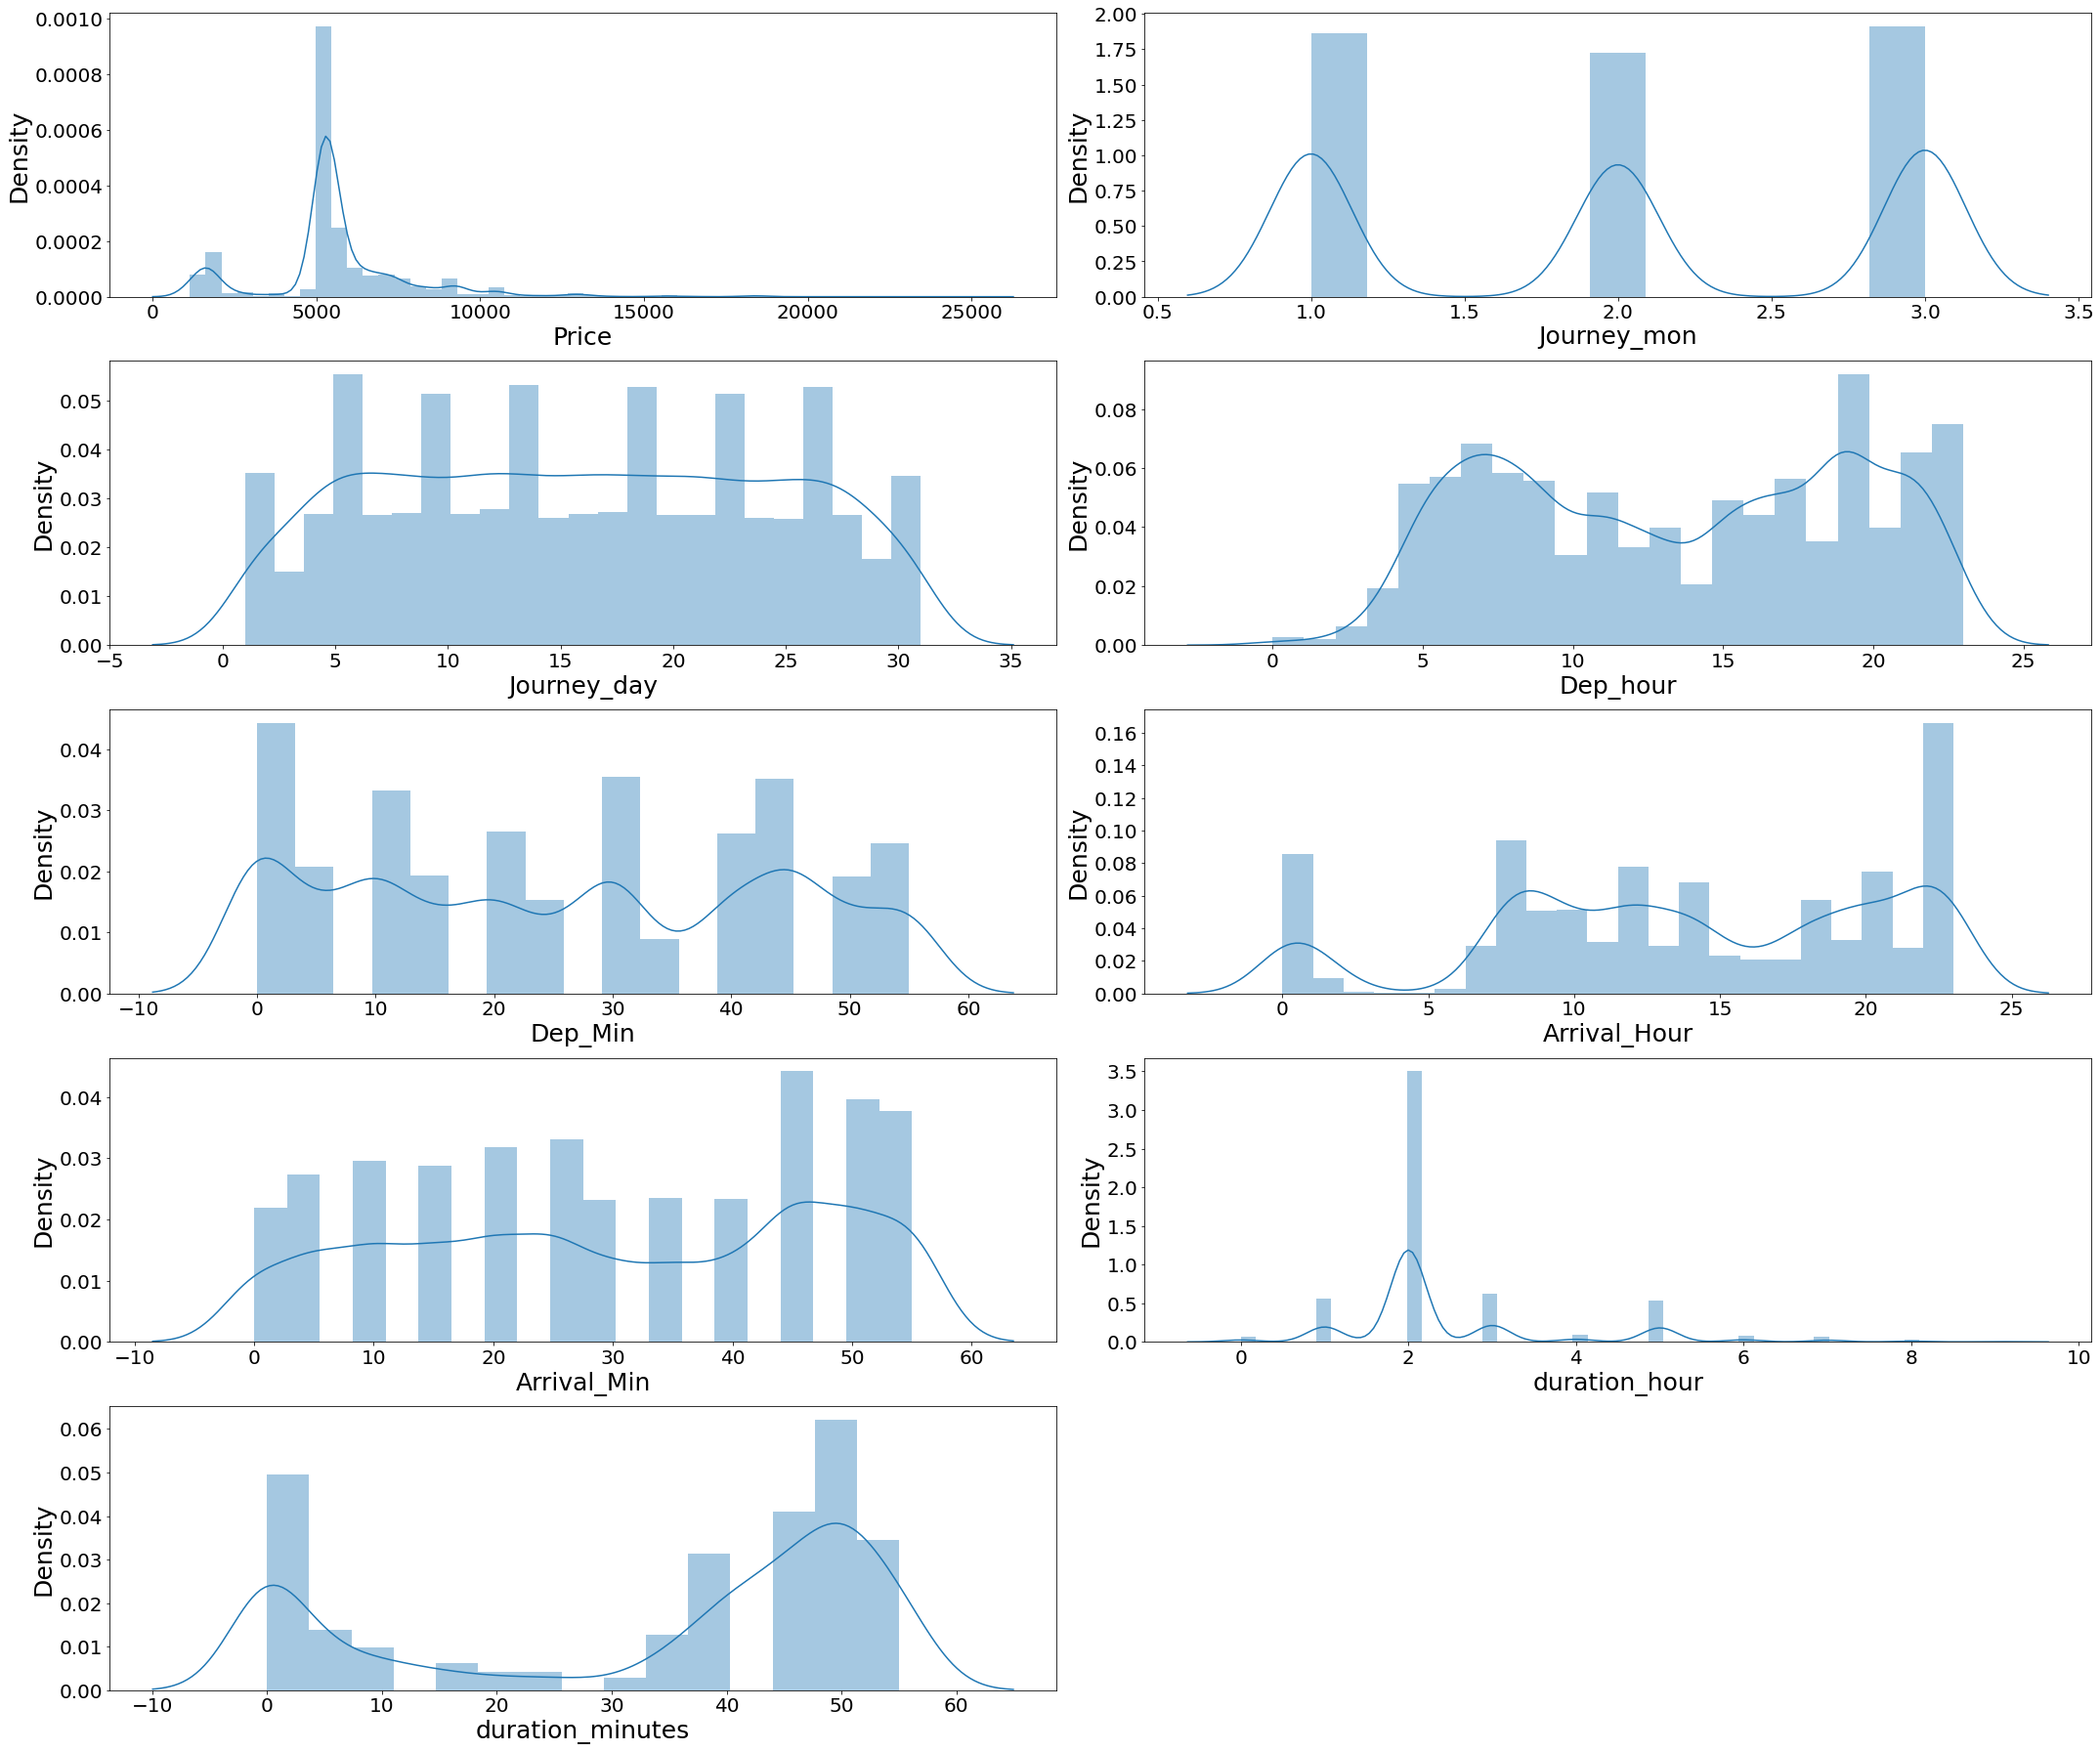

In [51]:
#Distribution plot for all numerical columns
plt.figure(figsize = (30,25))
plotnumber = 1
for column in df[cont_col]:
    if plotnumber <=9:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Density',fontsize = 25)
        plt.xticks(fontsize=20)  
        plt.yticks(fontsize=20)
    plotnumber+=1
plt.tight_layout()

We are able to observe skewness in duration minutes and duration hour in the dataset

In [52]:
#Bar plot for all Categorical columns

def count_plt(a):
    plt.figure(figsize = (12, 4))
    plt.title(cat_col[a])
    sns.countplot(cat_col[a],data=df)
    plt.xticks(rotation=90)
    plt.show()

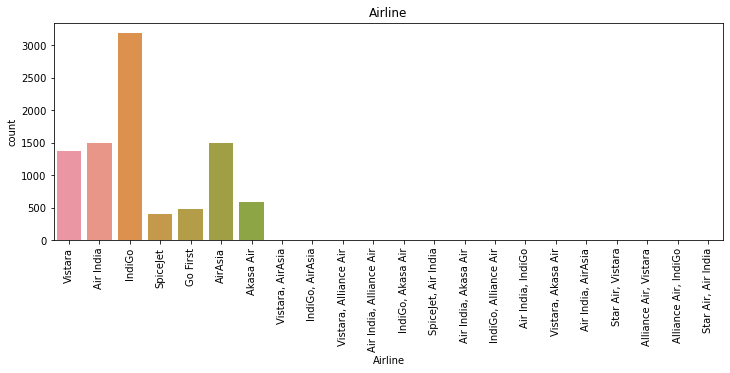

In [53]:
count_plt(0)

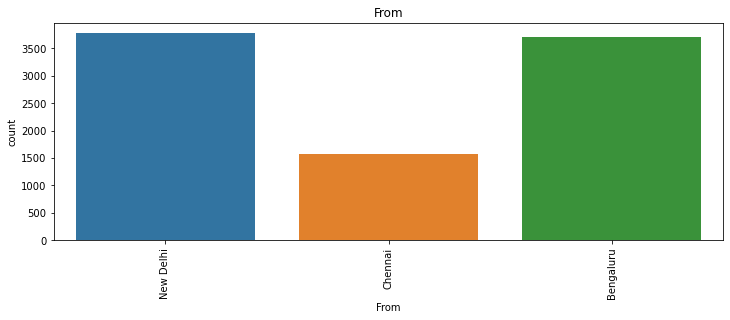

In [54]:
count_plt(1)

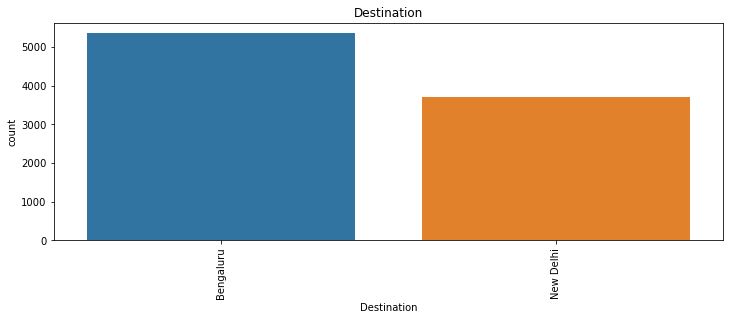

In [55]:
count_plt(2)

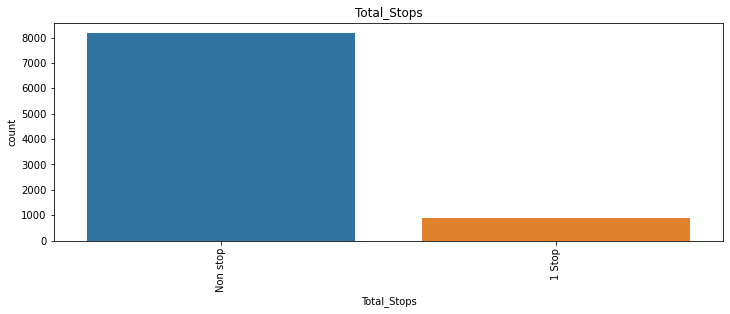

In [56]:
count_plt(3)

# Bivariate Analysis

In [106]:
cont_col

['Price',
 'Journey_mon',
 'Journey_day',
 'Dep_hour',
 'Dep_Min',
 'Arrival_Hour',
 'Arrival_Min',
 'duration_hour',
 'duration_minutes']

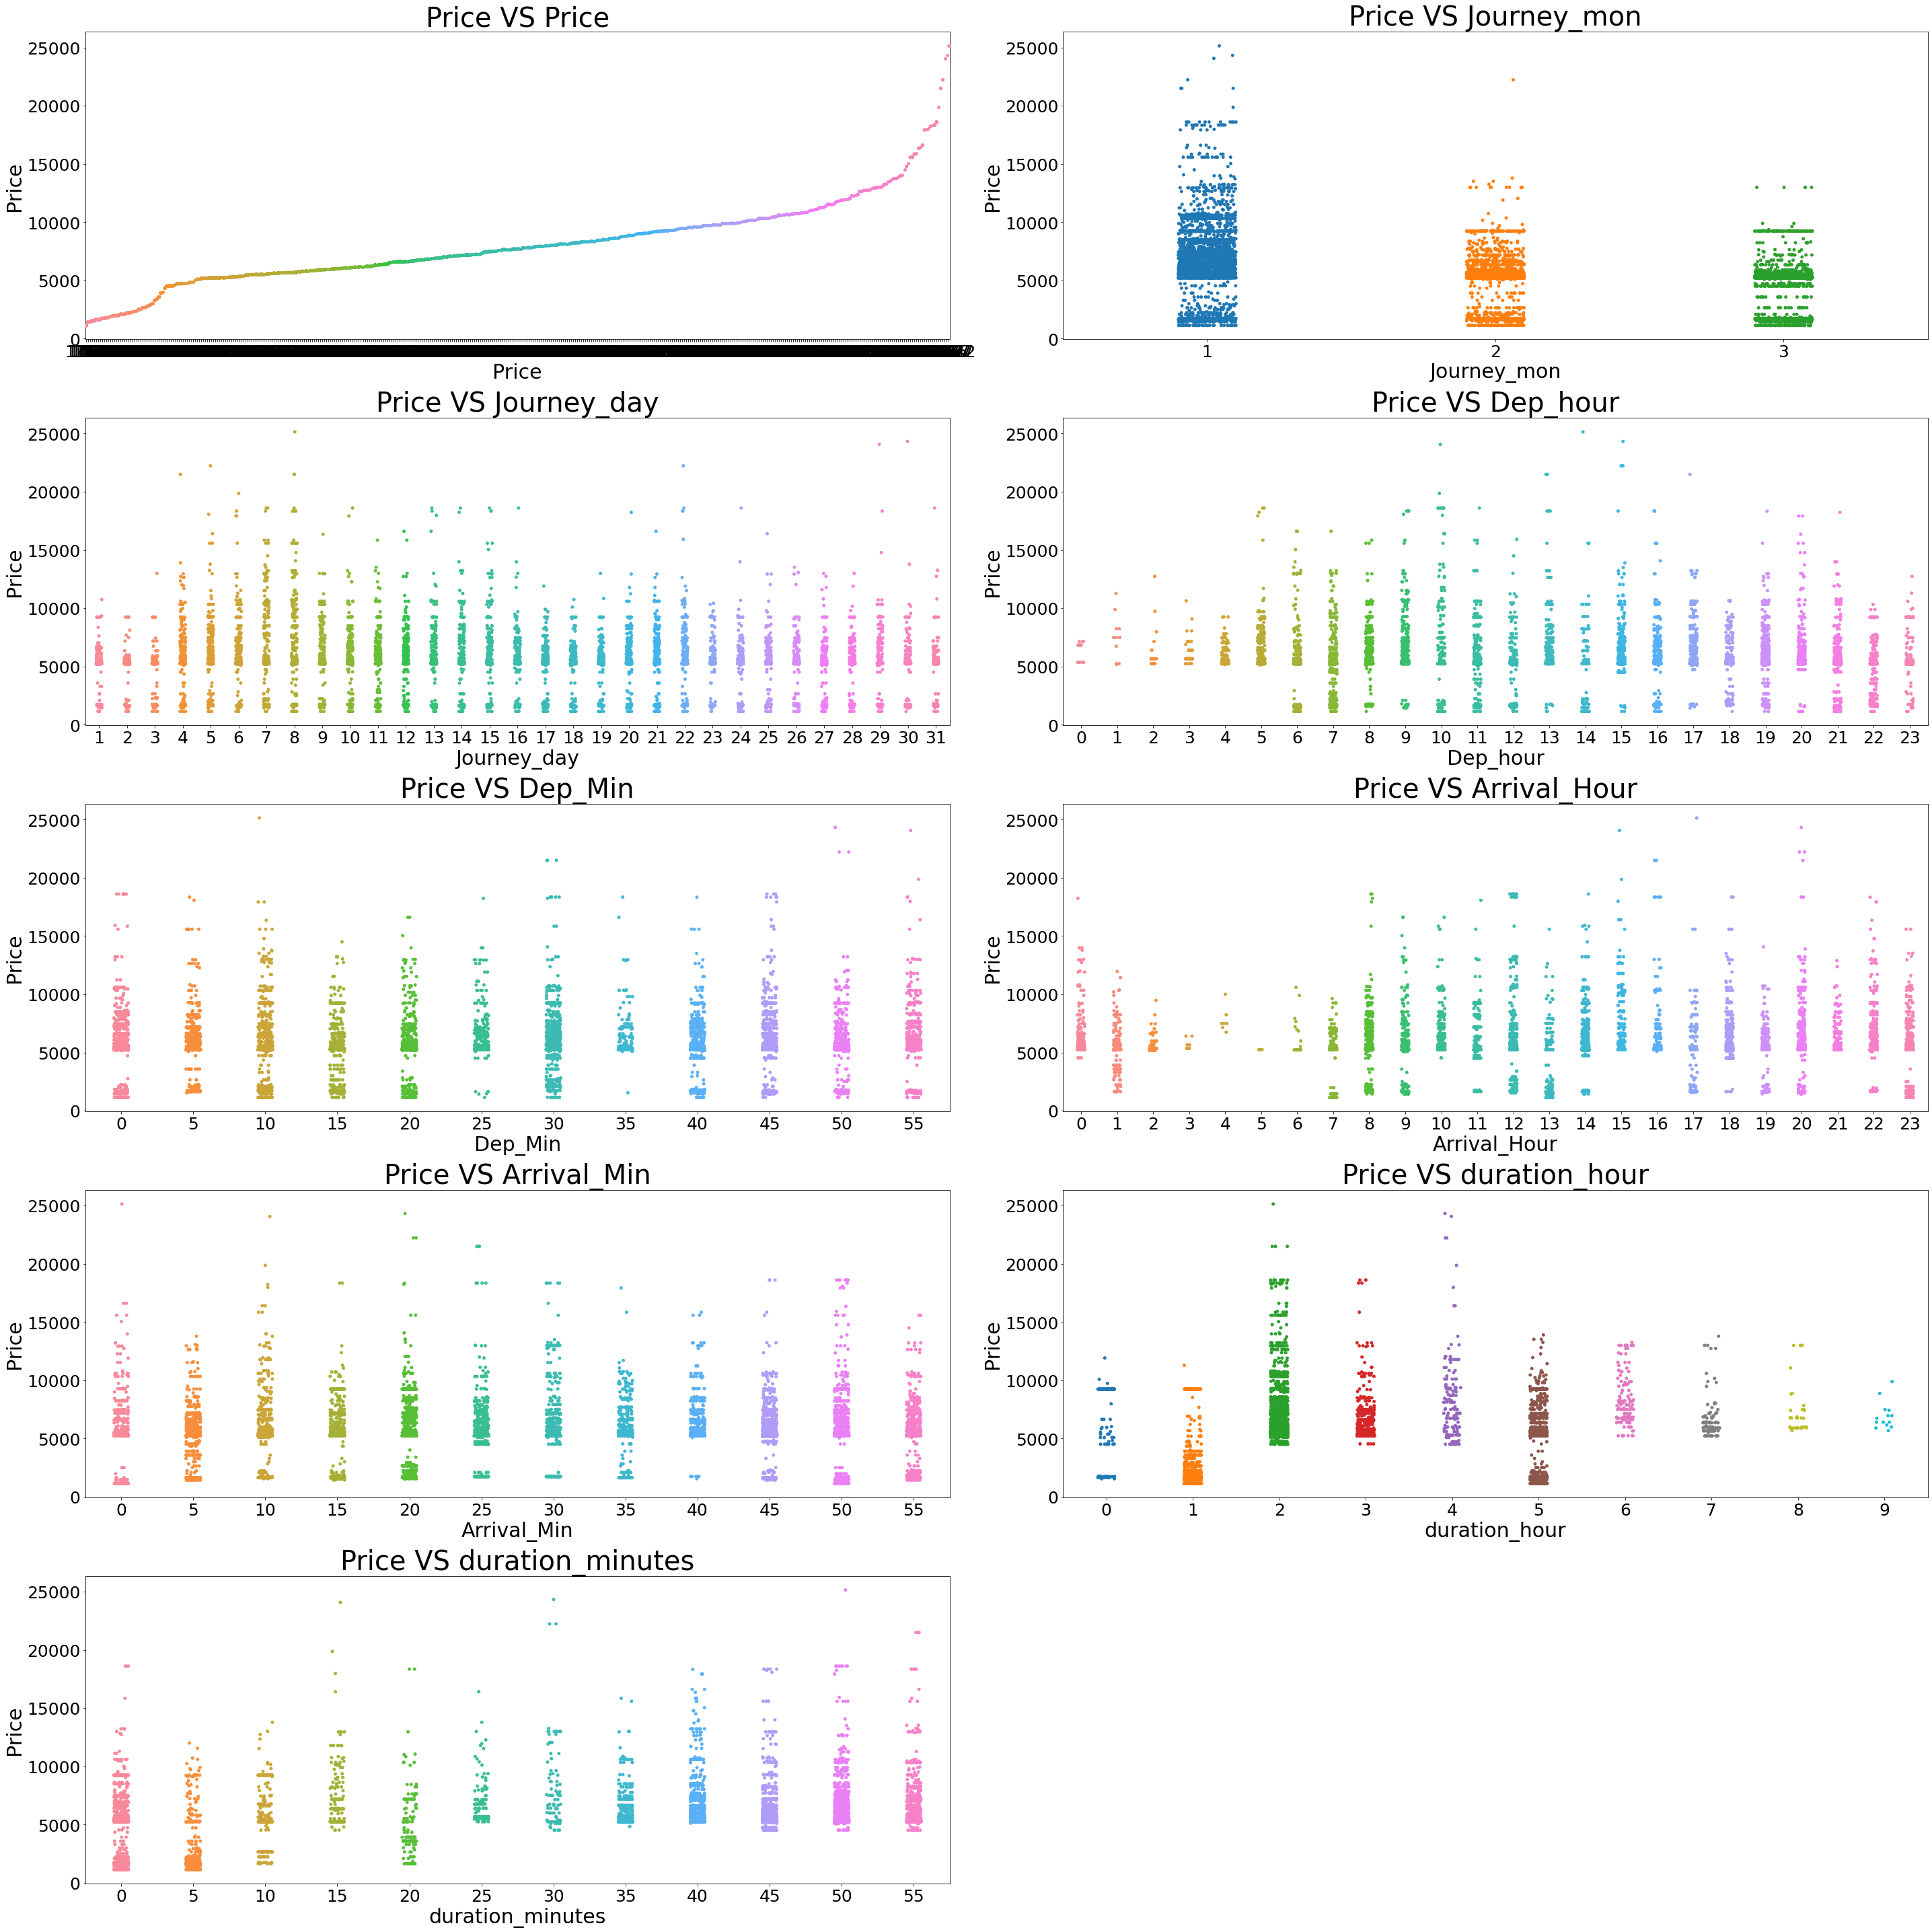

In [58]:
#stripplot for numerical columns

plt.figure(figsize=(40,40))
for i in range(len(cont_col)):
    plt.subplot(5,2,i+1)
    sns.stripplot(x=df[cont_col[i]] , y=df['Price'])
    plt.title(f"Price VS {cont_col[i]}",fontsize=40)
    plt.xticks(fontsize=25)  
    plt.yticks(fontsize=25)
    plt.xlabel(cont_col[i],fontsize = 30)
    plt.ylabel('Price',fontsize = 30)
    plt.tight_layout()

# Observations In Price Vs journey month


# Observations In Price Vs Journey day

# Observations In Price Vs Departure hour

# Observations In Price Vs Departure minute

# Observations In Price Vs Arrival hour

# Observations In Price Vs Arrival Minutes

# Observations In Price Vs Duration hours

# Observations In Price Vs Duration Minutes

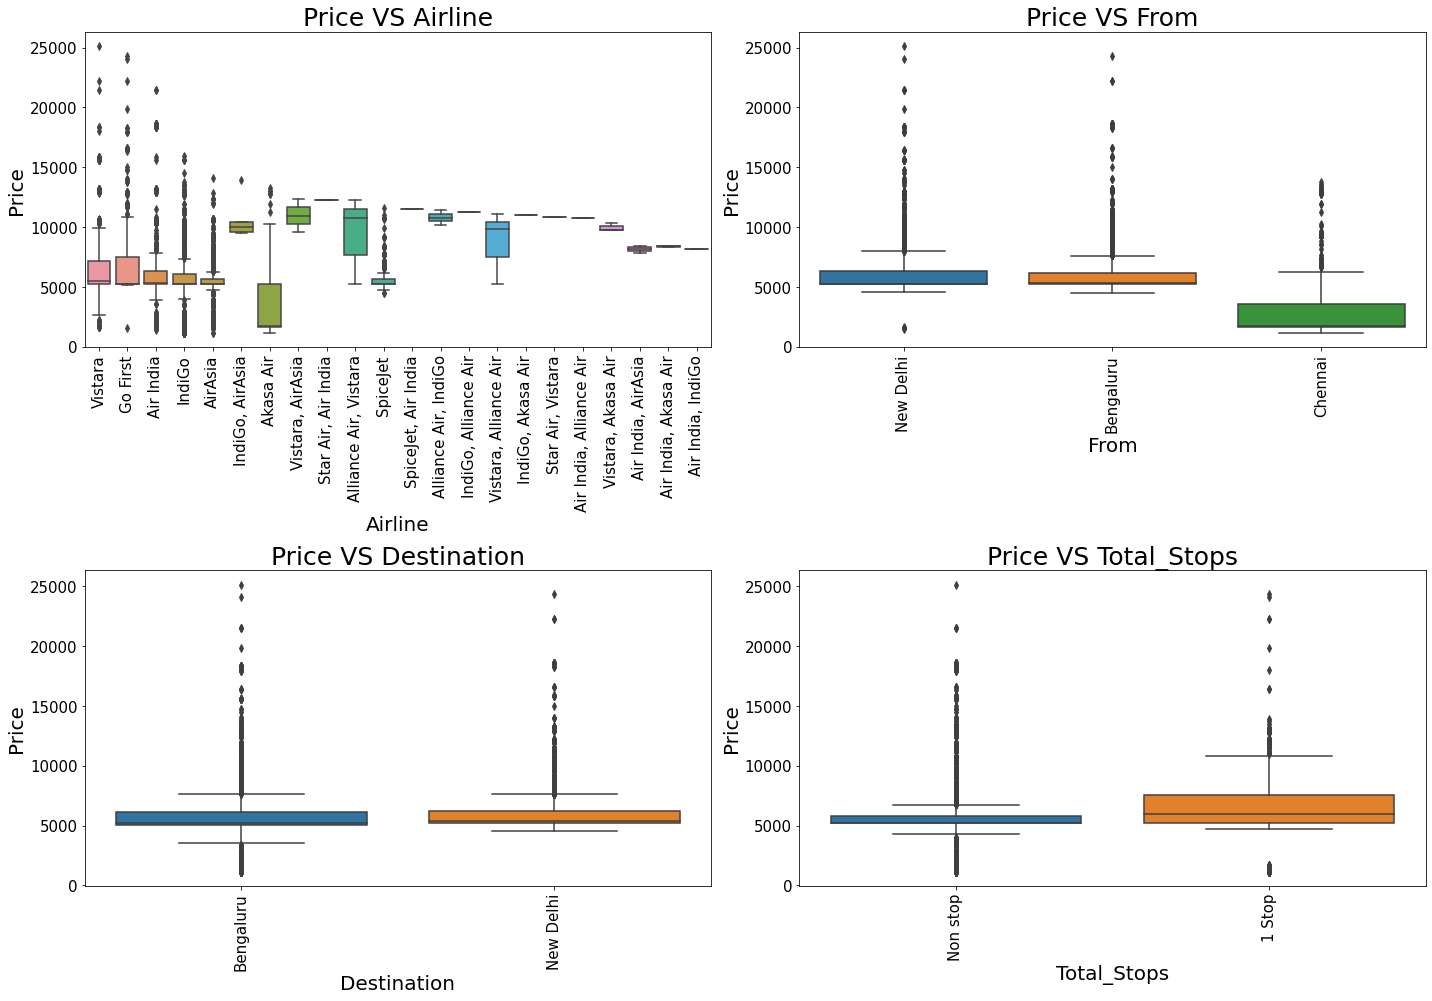

In [59]:
#Bar plot for all categorical columns
plt.figure(figsize=(20,20))
for i in range(len(cat_col)):
    plt.subplot(3,2,i+1)
    sns.boxplot(y='Price',x=cat_col[i],data=df.sort_values('Price',ascending=False))
    plt.title(f"Price VS {cat_col[i]}",fontsize=25)
    plt.xticks(rotation=90,fontsize=15)  
    plt.yticks(rotation=0,fontsize=15)
    plt.xlabel(cat_col[i],fontsize = 20)
    plt.ylabel('Price',fontsize = 20)
    plt.tight_layout()

# Observations In Price Vs Airlines

# Observations In Price Vs From

# Observations In Price Vs Destination

# Observations In Price Vs total stops

# Multivariate Analysis

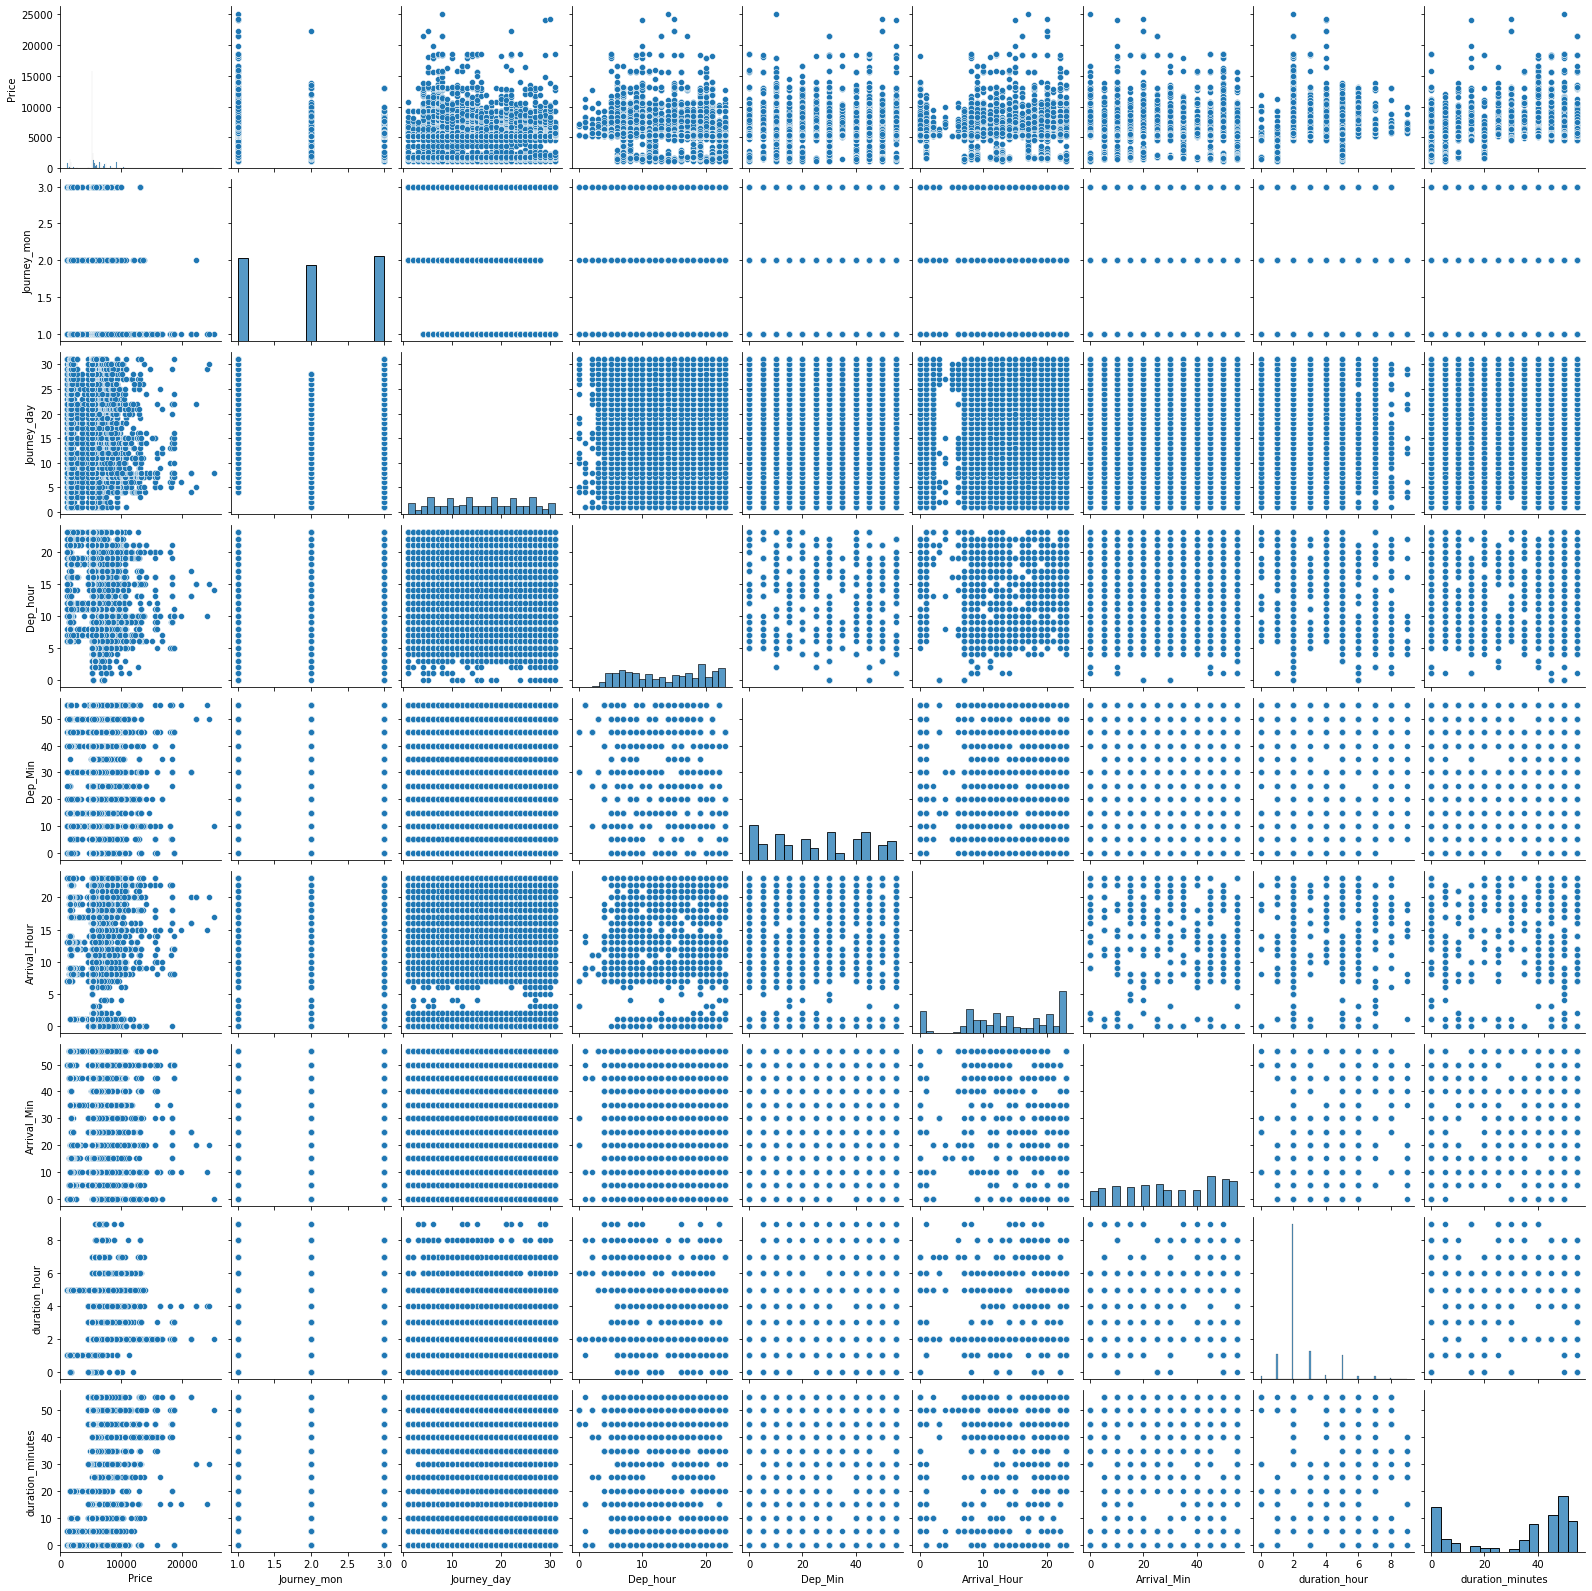

In [63]:
#pair ploting for df
sns.pairplot(df)

In [60]:
cont_columns=['Journey_mon','Journey_day','Dep_hour','Dep_Min','Arrival_Hour'
              ,'Arrival_Min','duration_hour','duration_minutes']

In [61]:
cont_col

['Price',
 'Journey_mon',
 'Journey_day',
 'Dep_hour',
 'Dep_Min',
 'Arrival_Hour',
 'Arrival_Min',
 'duration_hour',
 'duration_minutes']

# Checking for outliers

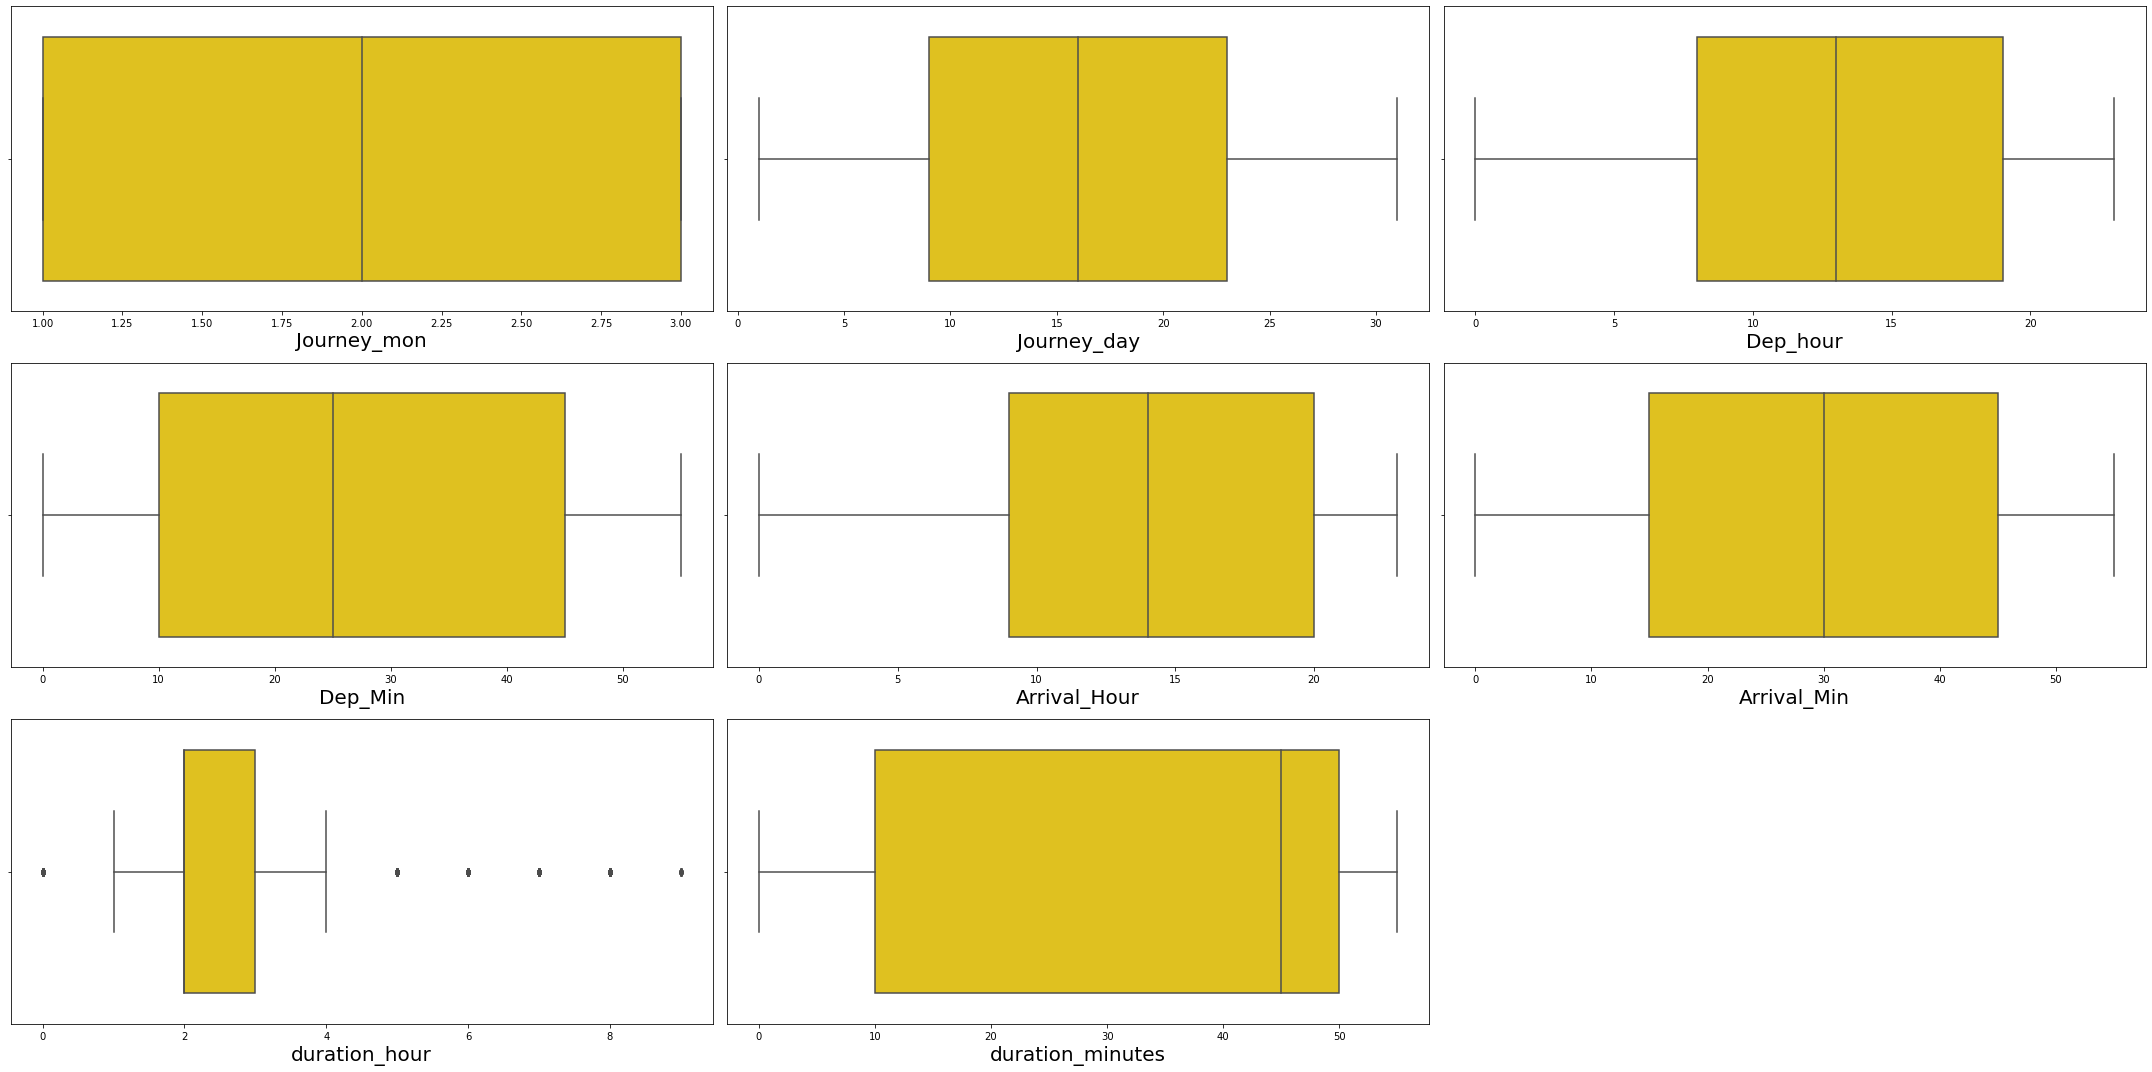

In [62]:
# Identifying the outliers using boxplot

plt.figure(figsize=(30,15),facecolor='white')
plotnumber=1
for column in cont_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are outliers in the column duration hour in the dataset

# Encoding

In [64]:
#Encoding the columns using LabelEncoder

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[cat_col]= df[cat_col].apply(LE.fit_transform)
df.head(10)

,Airline,From,Destination,Total_Stops,Price,Journey_mon,Journey_day,Dep_hour,Dep_Min,Arrival_Hour,Arrival_Min,duration_hour,duration_minutes
0,18,2,0,1,7184,1,4,5,35,8,20,2,45
1,18,2,0,1,7184,1,4,8,10,10,45,2,35
2,18,2,0,1,7184,1,4,9,5,11,50,2,45
3,18,2,0,1,7184,1,4,16,5,18,50,2,45
4,0,2,0,1,7184,1,4,16,55,20,15,3,20
5,18,2,0,1,7184,1,4,17,30,20,25,2,55
6,18,2,0,1,7184,1,4,19,55,22,40,2,45
7,18,2,0,1,7184,1,4,20,40,23,20,2,40
8,10,2,0,0,7487,1,4,5,10,14,35,9,25
9,14,2,0,1,8445,1,4,20,0,22,20,2,20


In [65]:
feat=df[['duration_hour']]

In [66]:
from scipy.stats import zscore


#zscore
z1=np.abs(zscore(feat))
threshold=3

In [67]:
#printing the outliers points in the dataset

print(np.where(z1>3))

(array([   8,   13,   19,   28,   46,   53,   82,  102,  142,  144,  152,
        154,  200,  304,  316,  342,  523,  569,  581,  624,  639,  769,
        793,  806,  845,  846,  855,  857,  898,  942, 1029, 1067, 1103,
       1113, 1127, 1197, 1255, 1301, 1345, 1390, 1417, 1527, 1528, 1536,
       1571, 1613, 1614, 1617, 1655, 1656, 1687, 1688, 1697, 1716, 1717,
       1719, 1782, 1785, 1823, 1866, 1908, 1952, 1992, 2173, 2293, 2295,
       2348, 2396, 2434, 2567, 2609, 2649, 2697, 2739, 2743, 2745, 2788,
       2829, 2872, 2874, 2914, 2970, 3013, 3056, 3100, 3825, 3935, 3936,
       3956, 3958, 3977, 4152, 4341, 4380, 4417, 4452, 4491, 4512, 5455,
       5456, 5550, 5736, 5737, 5775, 5825, 5872, 5879, 5928, 5995, 6096,
       6143, 6154, 6164, 6192, 6207, 6208, 6223, 6250, 6252, 6293, 6325,
       6333, 6344, 6390, 6505, 6514, 6523, 6524, 6536, 6579, 6594, 6634,
       6643, 6671, 6674, 6681, 6729, 6757, 6759, 6769, 6836, 6947, 6949,
       7080, 7089, 7136, 7254, 7380, 7428, 7553, 7

In [68]:
#saving the data without outlier points 
df_new_1=df[(z1<3).all(axis=1)]


In [69]:
#chcking df loss
df_loss=((df.shape[0]-df_new_1.shape[0])/df.shape[0])*100
print(df_loss)

1.6879964695498677


In [70]:
df=df_new_1

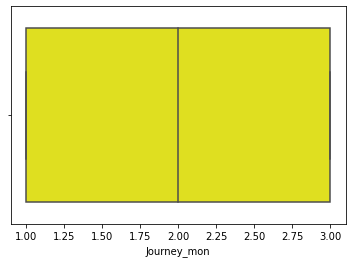

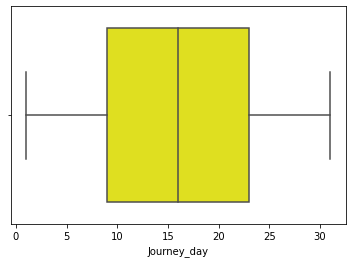

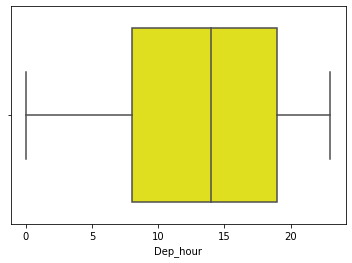

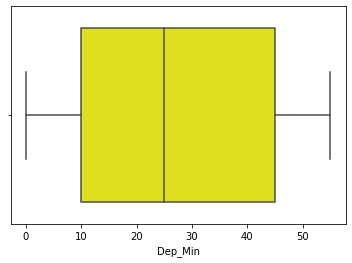

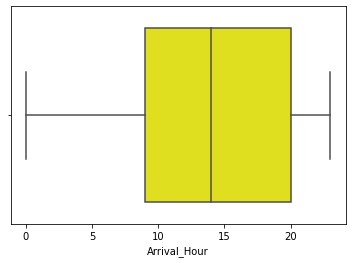

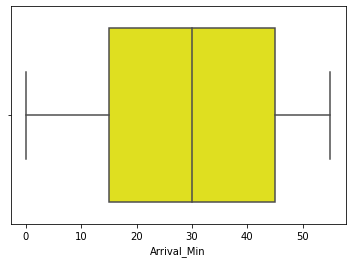

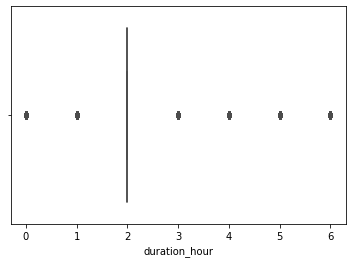

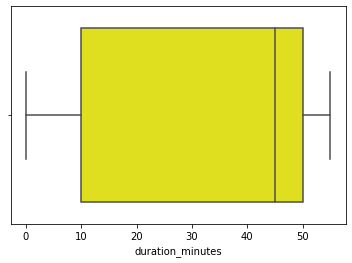

In [74]:
def bxplt(a):
    plt.figure()
    sns.boxplot(df[cont_columns[a]],data=df,color='yellow')
for i in range(0,8):
    bxplt(i)

we have reduced the outliers in the datset

In [75]:
#initialising X and y
X=df.drop(['Price'],axis=1)
y=df['Price']

In [76]:
#Checking for skewness
X.skew()

Airline             0.118921
From               -0.008615
Destination         0.366280
Total_Stops        -2.912005
Journey_mon        -0.029294
Journey_day         0.005054
Dep_hour           -0.052794
Dep_Min             0.063280
Arrival_Hour       -0.367505
Arrival_Min        -0.106015
duration_hour       1.398810
duration_minutes   -0.686058
dtype: float64

In [77]:
#Checking for skewness
X[cont_columns].skew()

Journey_mon        -0.029294
Journey_day         0.005054
Dep_hour           -0.052794
Dep_Min             0.063280
Arrival_Hour       -0.367505
Arrival_Min        -0.106015
duration_hour       1.398810
duration_minutes   -0.686058
dtype: float64

In [78]:
features=['duration_hour','duration_minutes']

In [79]:
from sklearn.preprocessing import PowerTransformer
#removing skewness
X[features]=PowerTransformer(method='yeo-johnson').fit_transform(X[features])

In [80]:
X[features].skew()

duration_hour      -0.009928
duration_minutes   -0.777511
dtype: float64

In [81]:
features=['duration_minutes']

In [82]:
X[features]=PowerTransformer(method='yeo-johnson').fit_transform(X[features])

In [83]:
X['duration_minutes'].skew()

-0.3285557979324398

In [84]:
X.head()

,Airline,From,Destination,Total_Stops,Journey_mon,Journey_day,Dep_hour,Dep_Min,Arrival_Hour,Arrival_Min,duration_hour,duration_minutes
0,18,2,0,1,1,4,5,35,8,20,-0.199083,0.438362
1,18,2,0,1,1,4,8,10,10,45,-0.199083,-0.245345
2,18,2,0,1,1,4,9,5,11,50,-0.199083,0.438362
3,18,2,0,1,1,4,16,5,18,50,-0.199083,0.438362
4,0,2,0,1,1,4,16,55,20,15,0.712208,-0.895083


# Checking For Multicollinearity

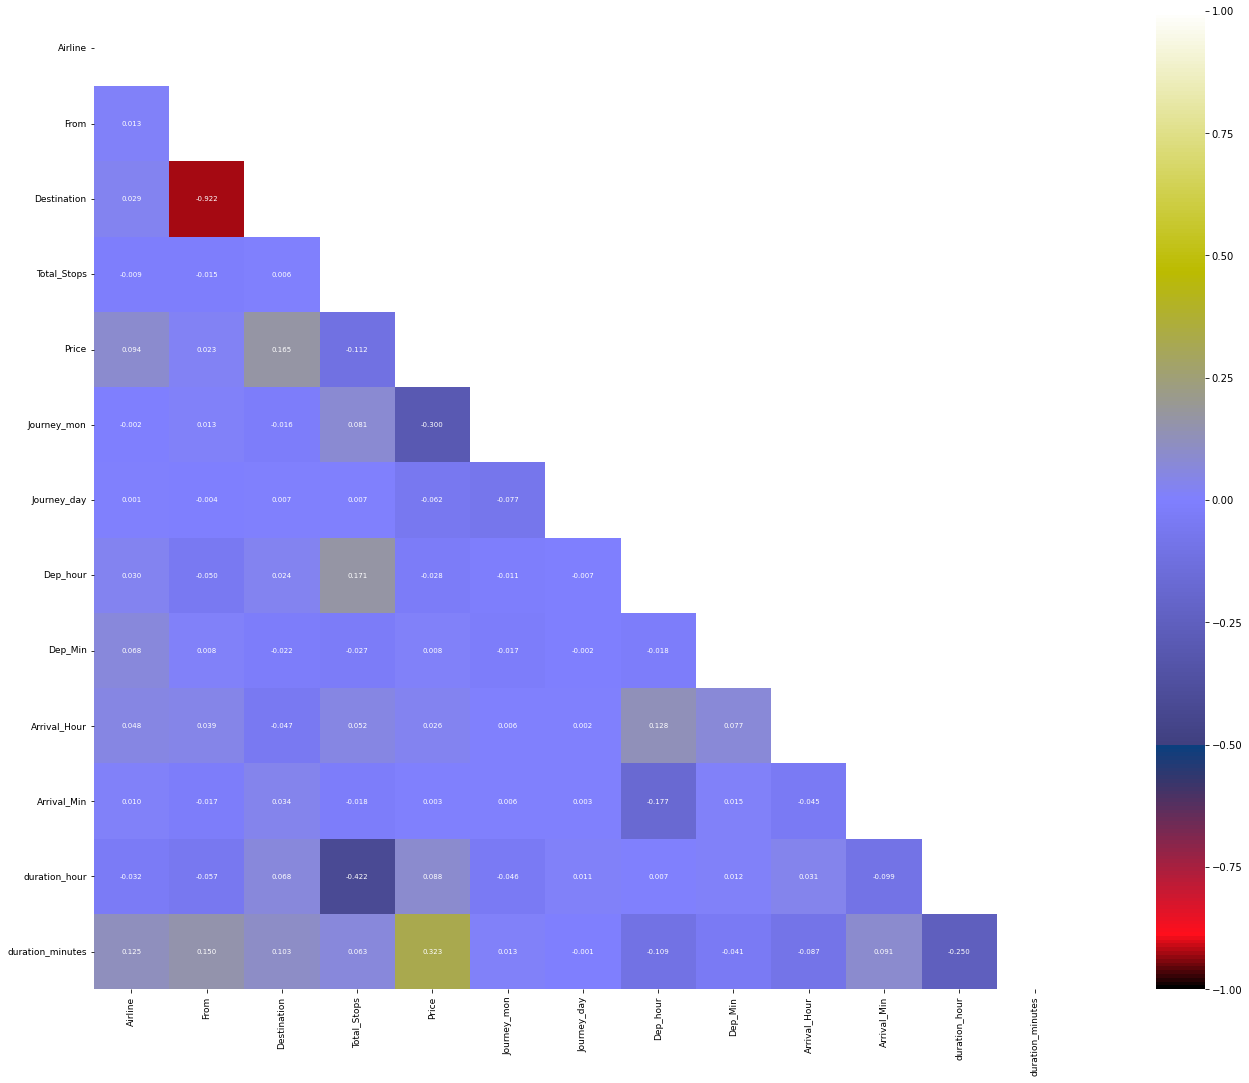

In [86]:
df_cor=df.corr()
upper_triangle = np.triu(df_cor)
plt.figure(figsize=(30,18))
sns.heatmap(df_cor, vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':7}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

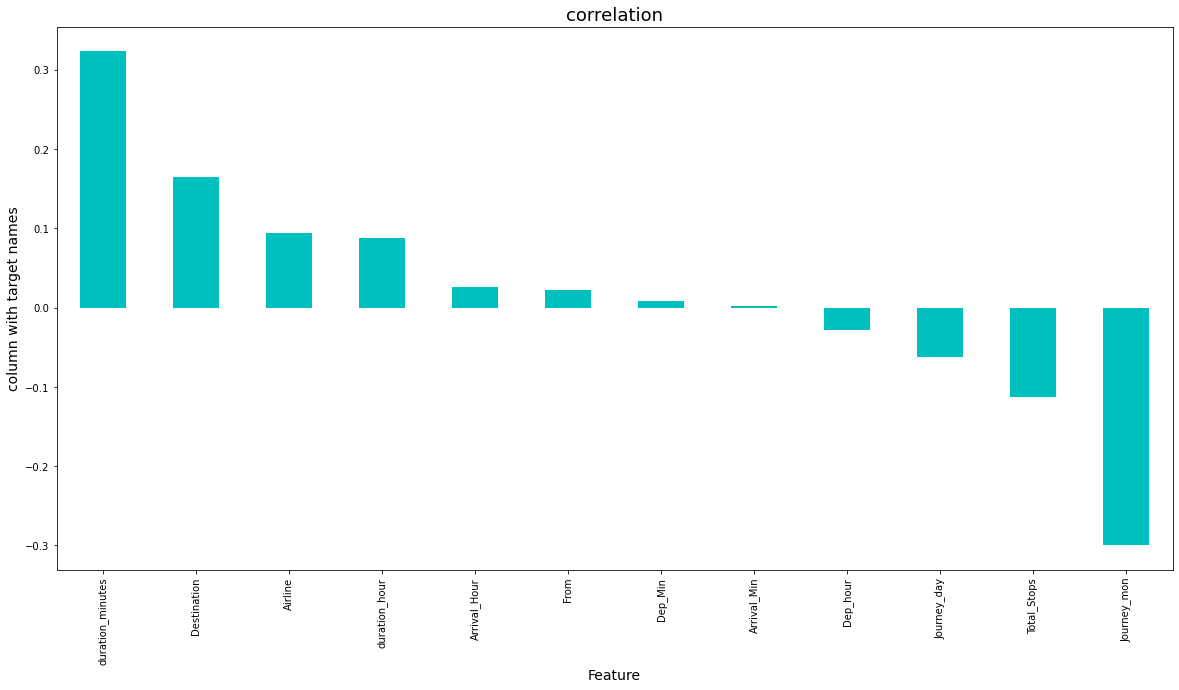

In [87]:
plt.figure(figsize=(20,10))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Scaling the data

In [88]:
X.head()

,Airline,From,Destination,Total_Stops,Journey_mon,Journey_day,Dep_hour,Dep_Min,Arrival_Hour,Arrival_Min,duration_hour,duration_minutes
0,18,2,0,1,1,4,5,35,8,20,-0.199083,0.438362
1,18,2,0,1,1,4,8,10,10,45,-0.199083,-0.245345
2,18,2,0,1,1,4,9,5,11,50,-0.199083,0.438362
3,18,2,0,1,1,4,16,5,18,50,-0.199083,0.438362
4,0,2,0,1,1,4,16,55,20,15,0.712208,-0.895083


In [89]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features']=X.columns
vif.sort_values('vif')

,vif,features
5,1.006695,Journey_day
4,1.014092,Journey_mon
7,1.014575,Dep_Min
0,1.024452,Airline
8,1.040341,Arrival_Hour
9,1.051016,Arrival_Min
6,1.095728,Dep_hour
3,1.195502,Total_Stops
10,1.328077,duration_hour
11,1.766029,duration_minutes


In [91]:
X.drop('Destination',axis=1,inplace=True)

In [92]:
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features']=X.columns
vif.sort_values('vif')

,vif,features
4,1.006671,Journey_day
3,1.013899,Journey_mon
6,1.013954,Dep_Min
0,1.018988,Airline
1,1.032914,From
7,1.039449,Arrival_Hour
8,1.050118,Arrival_Min
10,1.077340,duration_minutes
5,1.095642,Dep_hour
9,1.163022,duration_hour


No multicollinearity found in the dataset

In [93]:
X.drop('Arrival_Min',axis=1,inplace=True)

# feature selection

In [94]:
from sklearn.feature_selection import SelectKBest,f_classif

best_features = SelectKBest(score_func=f_classif ,k=9)

fit_ = best_features.fit(X,y)

df_scores = pd.DataFrame(fit_.scores_)
df_columns =pd.DataFrame(X.columns)


#concatenate dataframes

features_scores =pd.concat([df_columns,df_scores],axis=1 )
features_scores.columns = ['Feature_Name','Score']  #Name o/p col
features_scores.sort_values('Score')



,Feature_Name,Score
4,Journey_day,1.654390
5,Dep_hour,2.854287
6,Dep_Min,3.123221
7,Arrival_Hour,3.662819
0,Airline,3.740459
8,duration_hour,14.515178
3,Journey_mon,15.958432
9,duration_minutes,23.175782
2,Total_Stops,25.957940
1,From,99.183264


<Figure size 1440x720 with 0 Axes>

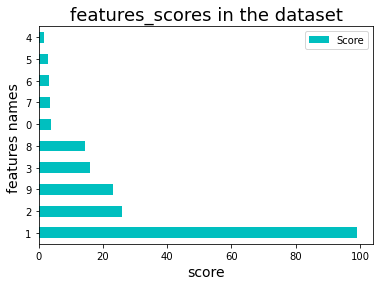

In [95]:
plt.figure(figsize=(20,10))
features_scores.sort_values('Score',ascending=False).plot(kind='barh',color='c')
plt.xlabel('score',fontsize=14)
plt.ylabel('features names ',fontsize=14)
plt.title('features_scores in the dataset',fontsize=18)
plt.show()


In [96]:
features_scores

,Feature_Name,Score
0,Airline,3.740459
1,From,99.183264
2,Total_Stops,25.957940
3,Journey_mon,15.958432
4,Journey_day,1.654390
5,Dep_hour,2.854287
6,Dep_Min,3.123221
7,Arrival_Hour,3.662819
8,duration_hour,14.515178
9,duration_minutes,23.175782


# Model Building

In [97]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor


from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from numpy import absolute

In [96]:
#finding best random_state
maxAccu=0 
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    r2=r2_score(y_test,predlr)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)


Best accuracy is  0.26792182742579607  on random_state  53


In [98]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=53)

In [99]:
# different algorithm going to use

lr=LinearRegression()

dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
knn=KNeighborsRegressor()
adr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
xgbr=XGBRegressor()
etr=ExtraTreesRegressor()

In [101]:
#shapes of x and y (train,test)
x_train.shape

(7128, 10)

In [102]:
#shape of test features
x_test.shape

(1783, 10)

In [103]:
#shape of train features
y_train.shape

(7128,)

In [104]:
#shape of test label
y_test.shape

(1783,)

In [105]:
#code for Training and Prediction for other models

def eval(x):
    mod=x
    print(mod)
    #training the data
    mod.fit(x_train,y_train)
    #Predicting the data
    pred_train=mod.predict(x_train)
    pred=mod.predict(x_test)
    
    print("r2_score for train data is {:.2f}%".format(r2_score(y_train,pred_train)*100))
    print("\n")
    print("r2_score for  test data is  {:.2f}%".format(r2_score(y_test,pred)*100))
    
    print("\n")
    print("Error")
    print("mean absolute error : ",mean_absolute_error(y_test,pred))
    print("mean squared error : ",mean_squared_error(y_test,pred))
    print("mean squared error is: ",np.sqrt(mean_squared_error(y_test,pred)))
    plt.scatter(x=y_test,y=pred,color='r')
    plt.plot(y_test,y_test,color='b')
    
    
    
    score=cross_val_score(mod,X,y,scoring='r2',cv=5)
    print("\n",mod,"Cross val score is ",score)
    score=absolute(score)
    print("mean is ",score.mean()*100,"\n\n")
    
    #difference between crossval score
    cros_val_dif=(r2_score(y_test,pred)*100)-(score.mean()*100)
    print("difference b/w accuracy and crossval score is",absolute(cros_val_dif))


LinearRegression()
r2_score for train data is 20.81%


r2_score for  test data is  26.79%


Error
mean absolute error :  1272.1115654835892
mean squared error :  4010027.756134298
mean squared error is:  2002.5053698140982

 LinearRegression() Cross val score is  [-0.25019991 -1.43895655 -0.96504014 -0.27203274 -5.33806513]
mean is  165.2858895233469 


difference b/w accuracy and crossval score is 138.4937067807673


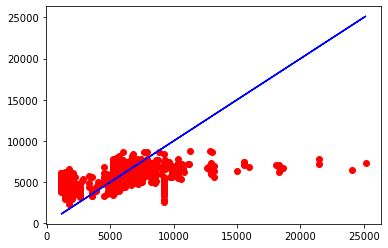

In [122]:
#calling linear model
eval(lr)

DecisionTreeRegressor()
r2_score for train data is 99.98%


r2_score for  test data is  53.29%


Error
mean absolute error :  598.3480089736399
mean squared error :  2558328.6468031406
mean squared error is:  1599.4776168496828

 DecisionTreeRegressor() Cross val score is  [-0.35664533 -0.86566627 -1.3857023  -0.07541639 -2.18621924]
mean is  97.39299072887665 


difference b/w accuracy and crossval score is 44.098317337422834


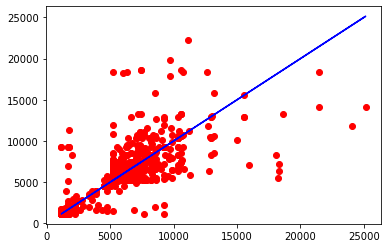

In [123]:
#calling DecisionTreeRegressor model
eval(dtr)

RandomForestRegressor()
r2_score for train data is 96.57%


r2_score for  test data is  78.10%


Error
mean absolute error :  482.05616183265226
mean squared error :  1199326.3803484843
mean squared error is:  1095.1376079509298

 RandomForestRegressor() Cross val score is  [ 0.22444536 -0.20344781 -1.19766795  0.08834865 -0.39020975]
mean is  42.082390466675875 


difference b/w accuracy and crossval score is 36.02248266038812


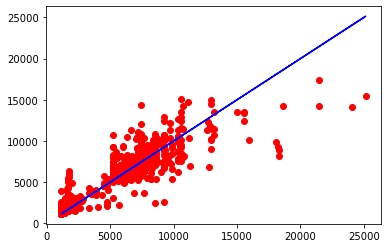

In [124]:
# RandomForestRegressor model
eval(rfr)

AdaBoostRegressor()
r2_score for train data is 31.72%


r2_score for  test data is  32.74%


Error
mean absolute error :  1233.2182197511122
mean squared error :  3684438.731913629
mean squared error is:  1919.4891851515156

 AdaBoostRegressor() Cross val score is  [ -0.25853703 -15.91818394  -2.3497211    0.0266846  -11.19757406]
mean is  595.0140147216974 


difference b/w accuracy and crossval score is 562.2778178137031


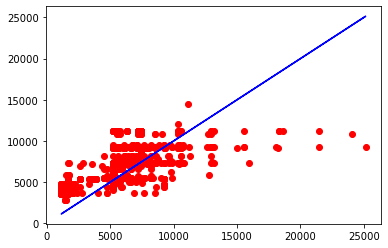

In [125]:
#calling AdaBoostRegressor model
eval(adr)

GradientBoostingRegressor()
r2_score for train data is 67.78%


r2_score for  test data is  66.26%


Error
mean absolute error :  696.6818496911934
mean squared error :  1848115.4169790715
mean squared error is:  1359.4540878525731

 GradientBoostingRegressor() Cross val score is  [-0.04072451 -0.32068103 -0.8424366  -0.19517848 -0.69618616]
mean is  41.90413570759179 


difference b/w accuracy and crossval score is 24.356323335401925


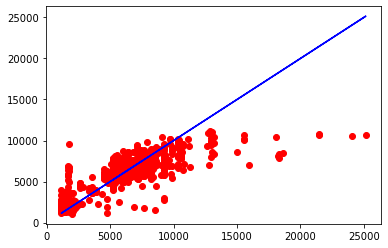

In [126]:
#calling GradientBoostingRegressor model
eval(gbr)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score for train data is 94.03%


r2_score for  test data is  79.13%


Error
mean absolute error :  514.6221337952242
mean squared error :  1142936.2275278876
mean squared error is:  1069.0819554776367

 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsampl

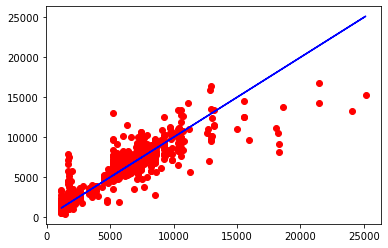

In [127]:
#calling XGBRegressor model
eval(xgbr)

ExtraTreesRegressor()
r2_score for train data is 99.98%


r2_score for  test data is  78.17%


Error
mean absolute error :  456.1042484576556
mean squared error :  1195601.741763923
mean squared error is:  1093.4357510909927

 ExtraTreesRegressor() Cross val score is  [ 0.11404642  0.10890283 -1.21695118  0.10040774 -1.60011067]
mean is  62.80837670702306 


difference b/w accuracy and crossval score is 15.364494119166949


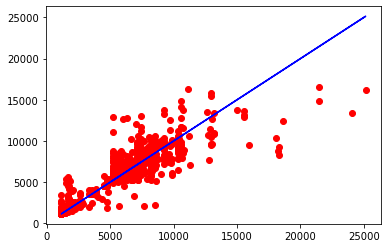

In [130]:
#calling ExtraTreesRegressor model
eval(etr)

KNeighborsRegressor()
r2_score for train data is 72.73%


r2_score for  test data is  59.91%


Error
mean absolute error :  679.8720134604599
mean squared error :  2195732.7503533373
mean squared error is:  1481.8005096345923

 KNeighborsRegressor() Cross val score is  [-0.47871595 -1.51434729 -0.97842846 -0.2404914  -3.7080772 ]
mean is  138.4012059171416 


difference b/w accuracy and crossval score is 78.48691397442437


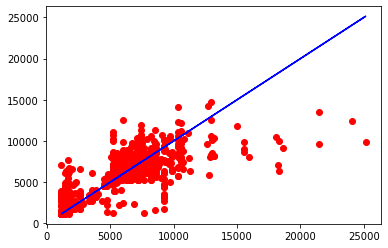

In [129]:
#calling KNeighborsRegressor model
eval(knn)

# Cross Validation

# After checking the least difference between the test accuracy and cross validation score XGBRegressor model has the least difference of 1.46 and the test accuracy of 79.13% and  80.59%

# Hypertuning

In [ ]:
booster: Select the type of model to run at each iteration
    
gbtree: tree-based models
    
gblinear: linear models
    
nthread: default to maximum number of threads available if not set
    
objective: This defines the loss function to be minimized

Parameters for controlling speed

subsample: Denotes the fraction of observations to be randomly samples for each tree

colsample_bytree: Subsample ratio of columns when constructing each tree.
n_estimators: Number of trees to fit.

Important parameters which control overfiting

learning_rate: Makes the model more robust by shrinking the weights on each step
max_depth: The maximum depth of a tree.
min_child_weight: Defines the minimum sum of weights of all observations required in a child.

In [131]:
#hypertuning parameters
param_tuning = {
        'learning_rate': [0.001, 0.01,0.1,1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5,0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 300,400],
        'objective': ['reg:squarederror']
    }

In [134]:
#importing gridsearch
from sklearn.model_selection import GridSearchCV

Grid_sear= GridSearchCV(estimator=xgbr,param_grid=param_tuning,cv= 5,n_jobs=-1)

In [135]:
#training the model with paramters
Grid_sear.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300, 400],
                         'objective': ['reg:squarederror'],
                         'subsample': [0.5, 0.7]})

In [136]:
#Best parameteters in the hypertuned model
Grid_sear.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 200,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [137]:
#training the model with gridsearch parameters

h_xgbr = XGBRegressor(learning_rate=0.1 , max_depth= 7, min_child_weight= 1, subsample= 0.7, 
                               colsample_bytree= .7,n_estimators=200,objective='reg:squarederror')


r2_score for train data is 95.11%


r2_score for  test data is  80.30%


Error
mean absolute error :  499.10857322466086
mean squared error :  1079226.9681460583
mean squared error is:  1038.858492840126


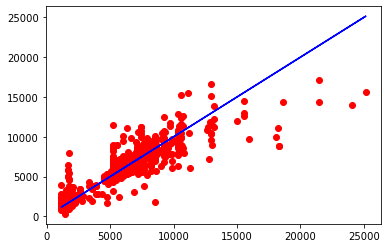

In [142]:

#training the data on hypertuned  XGBRegressor model

h_xgbr.fit(x_train,y_train)
#Predicting the data
pred_train=h_xgbr.predict(x_train)
pred=h_xgbr.predict(x_test)

print("r2_score for train data is {:.2f}%".format(r2_score(y_train,pred_train)*100))
print("\n")
print("r2_score for  test data is  {:.2f}%".format(r2_score(y_test,pred)*100))
print("\n")
print("Error")
print("mean absolute error : ",mean_absolute_error(y_test,pred))
print("mean squared error : ",mean_squared_error(y_test,pred))
print("mean squared error is: ",np.sqrt(mean_squared_error(y_test,pred)))

plt.scatter(x=y_test,y=pred,color='r')
plt.plot(y_test,y_test,color='b')

# Saving the model:

In [148]:
# Saving the model using .pkl
import joblib
joblib.dump(h_xgbr,"Flight_Price.pkl")

['Flight_Price.pkl']

I have saved my final model as Flight_Price.Using .pkl

# Predicting Flight Price for test dataset using Saved model of trained dataset:

In [150]:
# Loading the saved model
model=joblib.load("Flight_Price.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([6458.977 , 5330.366 , 5665.5713, ..., 4367.1304, 5144.3887,
       7335.446 ], dtype=float32)

In [154]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021